## **Proyecto- "Estimacion de ventas de clientes bancarios"**

In [1]:
import numpy as np
import pandas as pd
import pylab as plt
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

Dataset de entrenamiento. 

In [2]:
train=pd.read_csv( r'train_data_desafio.csv')

El dataset brindado posee gran cantidad de faltantes, en sus variables numericas que se puede deber a que los clientes no brindaron la informacion por que puede que sea un pedido del banco que no es obligatorio o no les impide operar con el mismo, esto es la hipotesis mas real ya que si fuera por algun error u omision los faltantes serian menos.
Tambien notamos que las variables categoricas no tienen absolutamente ningun faltante, esto es por que el informacion que tiene el banco de sus clientes, como los categoriza.

Las variable numericas se pueden clasificar como 

var_sum = "el importe de ventas diarios"

var_trx = " la cantidad de transacciones diarias"

var_prom = " el valor promedio de las ventas"

In [3]:
print(train.shape)
for col in train.columns:
    nulos=train[col].isna().sum()
    print(col, "{:.2f}%".format(nulos*100/799645))

(799645, 68)
id 0.00%
mes 0.00%
tipo_seg 0.00%
categoria 0.00%
tipo_com 0.00%
tipo_cat 0.00%
tipo_cli 0.00%
VAR1_sum 79.04%
VAR1_prom 79.04%
VAR1_trx 79.04%
VAR2_sum 87.05%
VAR2_prom 87.05%
VAR2_trx 87.05%
VAR3_sum 67.43%
VAR3_prom 67.43%
VAR3_trx 67.43%
VAR4_sum 65.07%
VAR4_prom 65.07%
VAR4_trx 65.07%
VAR5_sum 29.53%
VAR5_prom 29.53%
VAR5_trx 29.53%
VAR6_sum 99.69%
VAR6_prom 99.69%
VAR6_trx 99.69%
VAR7_sum 92.54%
VAR7_prom 92.54%
VAR7_trx 92.54%
VAR8_sum 95.61%
VAR8_prom 95.61%
VAR8_trx 95.61%
VAR9_sum 99.76%
VAR9_prom 99.76%
VAR9_trx 99.76%
VAR10_sum 99.41%
VAR11_sum 4.70%
VAR12_sum 4.70%
VAR13_sum 4.70%
VAR14_sum 4.70%
VAR15_sum 4.70%
VAR16_sum 94.59%
VAR17_sum 87.77%
VAR18_sum 4.70%
VAR19_sum 4.70%
VAR20_sum 4.70%
VAR21_sum 4.70%
VAR22_sum 4.70%
VAR23_sum 55.00%
VAR23_prom 55.00%
VAR23_trx 55.00%
VAR24_sum 89.19%
VAR24_prom 89.19%
VAR24_trx 89.19%
VAR25_sum 60.81%
VAR25_prom 60.81%
VAR25_trx 60.81%
VAR26_sum 99.48%
VAR26_prom 99.48%
VAR26_trx 99.48%
VAR27_sum 96.69%
VAR27_prom 96.6

Aqui importamos un dataset que es el mismo del pricipio pero que fue trabajado para obtener la suma de las ventas por cliente informadas en el mes de cada periodo mesual y lo mismo para las transacciones.
A su vez se calcularon los importes maximos en ventas y transacciones de cada periodo mensual informado, para tener refarencias sobre sus mayores movimientos.

Como dijimos anteriormente, que la falta de informacion en los importes de cada una de las variables en tan grande es la razon por la que generamos variables calculadas y con las cuales vamos a trabajar.

In [4]:
train_1=pd.read_csv( r'dfX.csv')

In [5]:
train_1.head()

,Sum_total,MAX_Sum,Sum_trx_total,MAX_trx
0,95455087.86,47209730.0,1.0,1.0
1,21141810.58,10239169.0,145.0,92.0
2,12718084.92,4920076.0,19.0,11.0
3,80920367.75,30643382.0,12.0,11.0
4,90222456.58,34485374.0,42.0,11.0


In [6]:
train_1.columns

Index(['Sum_total', 'MAX_Sum', 'Sum_trx_total', 'MAX_trx'], dtype='object')

In [7]:
train_1.isna().sum()

Sum_total        0
MAX_Sum          0
Sum_trx_total    0
MAX_trx          0
dtype: int64

Concatenamos los datasets.

In [8]:
train=pd.concat([train,train_1],axis=1)

In [9]:
train.columns

Index(['id', 'mes', 'tipo_seg', 'categoria', 'tipo_com', 'tipo_cat',
       'tipo_cli', 'VAR1_sum', 'VAR1_prom', 'VAR1_trx', 'VAR2_sum',
       'VAR2_prom', 'VAR2_trx', 'VAR3_sum', 'VAR3_prom', 'VAR3_trx',
       'VAR4_sum', 'VAR4_prom', 'VAR4_trx', 'VAR5_sum', 'VAR5_prom',
       'VAR5_trx', 'VAR6_sum', 'VAR6_prom', 'VAR6_trx', 'VAR7_sum',
       'VAR7_prom', 'VAR7_trx', 'VAR8_sum', 'VAR8_prom', 'VAR8_trx',
       'VAR9_sum', 'VAR9_prom', 'VAR9_trx', 'VAR10_sum', 'VAR11_sum',
       'VAR12_sum', 'VAR13_sum', 'VAR14_sum', 'VAR15_sum', 'VAR16_sum',
       'VAR17_sum', 'VAR18_sum', 'VAR19_sum', 'VAR20_sum', 'VAR21_sum',
       'VAR22_sum', 'VAR23_sum', 'VAR23_prom', 'VAR23_trx', 'VAR24_sum',
       'VAR24_prom', 'VAR24_trx', 'VAR25_sum', 'VAR25_prom', 'VAR25_trx',
       'VAR26_sum', 'VAR26_prom', 'VAR26_trx', 'VAR27_sum', 'VAR27_prom',
       'VAR27_trx', 'VAR28_sum', 'VAR28_prom', 'VAR28_trx', 'VAR30_prom',
       'VAR30_ratio', 'target_mes', 'Sum_total', 'MAX_Sum', 'Sum_trx_total',
  

In [10]:
train.head()

,id,mes,tipo_seg,categoria,tipo_com,tipo_cat,tipo_cli,VAR1_sum,VAR1_prom,VAR1_trx,...,VAR28_sum,VAR28_prom,VAR28_trx,VAR30_prom,VAR30_ratio,target_mes,Sum_total,MAX_Sum,Sum_trx_total,MAX_trx
0,a7777919487b,201811,PROD1,V6,COM2,RUBRO1,CLI2,NaN,NaN,NaN,...,NaN,NaN,NaN,809655.0,0.0,11.86,95455087.86,47209730.0,1.0,1.0
1,fcaa7556c315,201811,PROD1/PROD3,V6,COM3,RUBRO1,CLI2,1304600.0,14913.0,92.0,...,NaN,NaN,NaN,1000000.0,1.0,18.58,21141810.58,10239169.0,145.0,92.0
2,3bc2de7ac748,201811,PROD1,V6,COM2,RUBRO1,CLI2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.92,12718084.92,4920076.0,19.0,11.0
3,fd625fa72713,201811,PROD1/PROD2,V6,COM3,RUBRO1,CLI2,NaN,NaN,NaN,...,NaN,NaN,NaN,12026754.0,0.0,25.75,80920367.75,30643382.0,12.0,11.0
4,6149148b99bd,201811,PROD1/PROD3,V4,COM3,RUBRO1,CLI2,251500.0,45791.0,6.0,...,NaN,NaN,NaN,NaN,NaN,19.58,90222456.58,34485374.0,42.0,11.0


In [11]:
train.describe()

,mes,VAR1_sum,VAR1_prom,VAR1_trx,VAR2_sum,VAR2_prom,VAR2_trx,VAR3_sum,VAR3_prom,VAR3_trx,...,VAR28_sum,VAR28_prom,VAR28_trx,VAR30_prom,VAR30_ratio,target_mes,Sum_total,MAX_Sum,Sum_trx_total,MAX_trx
count,799645.000000,1.675850e+05,1.675850e+05,167585.000000,1.035680e+05,1.035680e+05,103568.000000,2.604090e+05,2.604090e+05,260409.000000,...,5.778900e+04,5.778900e+04,57789.000000,2.806730e+05,280673.000000,799645.000000,7.996450e+05,7.996450e+05,799645.000000,799645.000000
mean,201970.709496,2.436158e+06,7.087228e+04,123.464582,1.704199e+07,6.520918e+05,23.943602,1.399666e+07,3.946341e+06,7.577353,...,8.404618e+07,4.718607e+07,1.662496,2.358463e+06,0.046442,41.689772,1.420491e+08,8.889393e+07,61.117139,44.501916
std,77.954205,1.095139e+07,3.578166e+05,876.445521,6.103005e+07,2.161094e+06,15.473855,4.396866e+07,1.643295e+07,16.789980,...,2.459439e+08,1.072808e+08,1.522047,4.126634e+06,0.210508,107.614320,9.133779e+08,8.783098e+08,418.188715,408.479550
min,201811.000000,1.000000e+00,1.000000e+00,1.000000,0.000000e+00,0.000000e+00,1.000000,1.075000e+03,1.075000e+03,1.000000,...,0.000000e+00,0.000000e+00,1.000000,1.000000e+00,0.000000,0.000000,2.018110e+05,2.018110e+05,0.000000,0.000000
25%,201907.000000,2.380000e+05,1.056600e+04,7.000000,1.573641e+06,9.828600e+04,15.000000,8.108000e+05,2.977310e+05,1.000000,...,5.483250e+05,4.148080e+05,1.000000,4.076810e+05,0.000000,2.860000,7.829468e+06,4.591873e+06,4.000000,3.000000
50%,202002.000000,7.165600e+05,2.181100e+04,29.000000,5.215644e+06,2.316305e+05,21.000000,3.183369e+06,8.191150e+05,3.000000,...,1.833259e+07,1.234856e+07,1.000000,1.000000e+06,0.000000,12.780000,3.387054e+07,1.741661e+07,15.000000,9.000000
75%,202009.000000,1.983177e+06,5.000000e+04,94.000000,1.451981e+07,5.806338e+05,36.000000,1.154832e+07,2.520723e+06,7.000000,...,8.005697e+07,5.023172e+07,2.000000,2.500000e+06,0.000000,39.750000,1.152457e+08,5.944105e+07,51.000000,30.000000
max,202108.000000,1.868772e+09,6.500000e+07,166876.000000,8.963513e+09,3.538261e+08,459.000000,5.173952e+09,2.093000e+09,779.000000,...,5.715734e+09,3.820489e+09,28.000000,1.464218e+08,3.000000,7723.360000,1.727214e+11,1.725000e+11,167692.000000,166876.000000


## Outliers.
Ahora vamos a trabajar los outliers.
Para una mayor seguridad graficamos los boxplots de las variables.

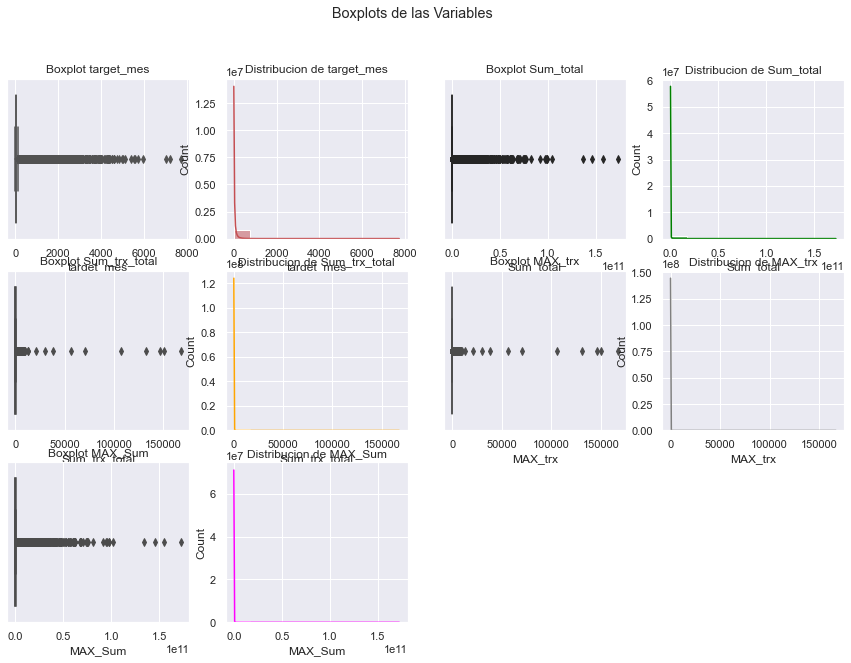

In [12]:
sns.set()
plt.figure(figsize=(15,10))
plt.suptitle("Boxplots de las Variables")
plt.subplot(3,4,1)
sns.boxplot(x=train["target_mes"],color="r");plt.title("Boxplot target_mes");plt.xlabel("target_mes")
plt.subplot(3,4,2)
sns.histplot(x=train["target_mes"],bins=10,color="r",kde=True);plt.title("Distribucion de target_mes")
plt.subplot(3,4,3)
sns.boxplot(x=train["Sum_total"],color="green");plt.title("Boxplot Sum_total");plt.xlabel("Sum_total")
plt.subplot(3,4,4)
sns.histplot(x=train["Sum_total"],bins=10,color="green",kde=True);plt.title("Distribucion de Sum_total")
plt.subplot(3,4,5)
sns.boxplot(x=train["Sum_trx_total"],color="orange");plt.title("Boxplot Sum_trx_total");plt.xlabel("Sum_trx_total")
plt.subplot(3,4,6)
sns.histplot(x=train["Sum_trx_total"],bins=10,color="orange",kde=True);plt.title("Distribucion de Sum_trx_total")
plt.subplot(3,4,7)
sns.boxplot(x=train["MAX_trx"],color="grey");plt.title("Boxplot MAX_trx");plt.xlabel("MAX_trx")
plt.subplot(3,4,8)
sns.histplot(x=train["MAX_trx"],bins=10,color="grey",kde=True);plt.title("Distribucion de MAX_trx")
plt.subplot(3,4,9)
sns.boxplot(x=train["MAX_Sum"],color="magenta");plt.title("Boxplot MAX_Sum");plt.xlabel("MAX_Sum")
plt.subplot(3,4,10)
sns.histplot(x=train["MAX_Sum"],bins=10,color="magenta",kde=True);plt.title("Distribucion de MAX_Sum")
plt.show()

Empezamos con "target_mes" donde calculamos el rango inter cuartil y los bigotes superior e inferior para poder filtrar los outliers.

Observamos que el bigote superior es de 95 metros.

A su vez vemos que el bigote inferior es negativo por lo que no filtraremos.

In [13]:
Q1_target=train["target_mes"].quantile(0.25)
Q3_target=train["target_mes"].quantile(0.75)
IQR=Q3_target-Q1_target
BI_target=(Q1_target-1.5*IQR)
BS_target=(Q3_target+1.5*IQR)
print("BI_target_mes:",BI_target)
print("BS_target_mes:",BS_target)

BI_target_mes: -52.475
BS_target_mes: 95.08500000000001


Solo filtramos por target_mes menores a 380, 4 desviaciones standar para no filtrar mucho y seguir trabajando con la mayor cantidad de instancias posibles.

In [14]:
train=train[(train["target_mes"])<=380]
print(train.shape)

(789557, 72)


Seguimos con "Sum_total"

In [15]:
Q1_Sum_total=train["Sum_total"].quantile(0.25)
Q3_Sum_total=train["Sum_total"].quantile(0.75)
IQR=Q3_Sum_total-Q1_Sum_total
BI_Sum_total=(Q1_Sum_total-1.5*IQR)
BS_Sum_total=(Q3_Sum_total+1.5*IQR)
print("BI_Sum_total:",BI_Sum_total)
print("BS_Sum_total:",BS_Sum_total)

BI_Sum_total: -147234076.815
BS_Sum_total: 265835829.065


Solo filtramos por Sum_total menores a 398753743 $, 1.5 desviaciones standar para no filtrar mucho y seguir trabajando con la mayor cantidad de instancias posibles.

In [16]:
train=train[(train["Sum_total"])<=398753743]
print(train.shape)

(737947, 72)


Seguimos con "Sum_trx_total"

In [17]:
Q1_Sum_trx_total=train["Sum_trx_total"].quantile(0.25)
Q3_Sum_trx_total=train["Sum_trx_total"].quantile(0.75)
IQR=Q3_Sum_trx_total-Q1_Sum_trx_total
BI_Sum_trx_total=(Q1_Sum_trx_total-1.5*IQR)
BS_Sum_trx_total=(Q3_Sum_trx_total+1.5*IQR)
print("BI_Sum_trx_total:",BI_Sum_trx_total)
print("BS_Sum_trx_total:",BS_Sum_trx_total)

BI_Sum_trx_total: -57.5
BS_Sum_trx_total: 106.5


Solo filtramos por Sum_trx_total menores a 160 $, 1.5 desviaciones standar para no filtrar mucho y seguir trabajando con la mayor cantidad de instancias posibles.

In [18]:
train=train[(train["Sum_trx_total"])<=160]
print(train.shape)

(689671, 72)


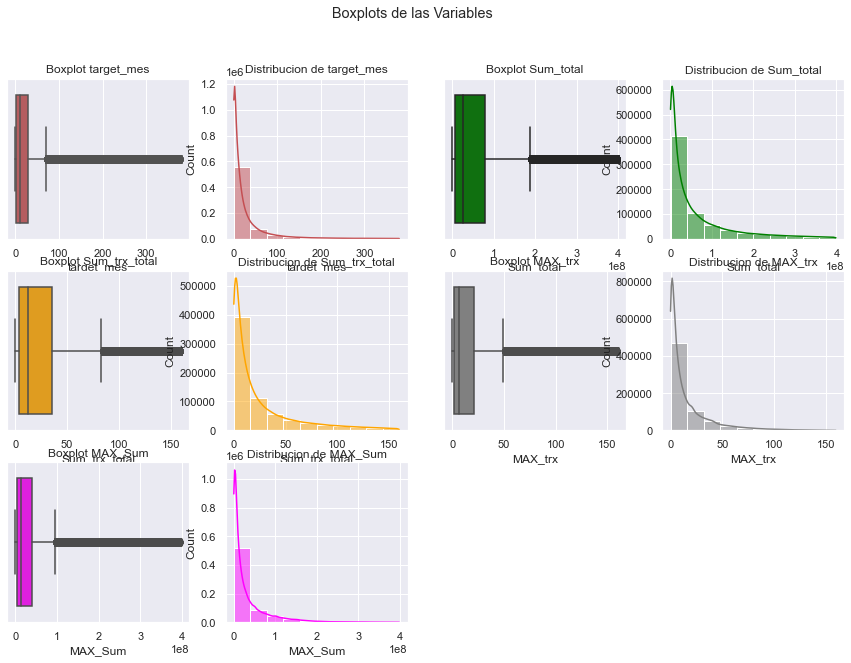

In [19]:
sns.set()
plt.figure(figsize=(15,10))
plt.suptitle("Boxplots de las Variables")
plt.subplot(3,4,1)
sns.boxplot(x=train["target_mes"],color="r");plt.title("Boxplot target_mes");plt.xlabel("target_mes")
plt.subplot(3,4,2)
sns.histplot(x=train["target_mes"],bins=10,color="r",kde=True);plt.title("Distribucion de target_mes")
plt.subplot(3,4,3)
sns.boxplot(x=train["Sum_total"],color="green");plt.title("Boxplot Sum_total");plt.xlabel("Sum_total")
plt.subplot(3,4,4)
sns.histplot(x=train["Sum_total"],bins=10,color="green",kde=True);plt.title("Distribucion de Sum_total")
plt.subplot(3,4,5)
sns.boxplot(x=train["Sum_trx_total"],color="orange");plt.title("Boxplot Sum_trx_total");plt.xlabel("Sum_trx_total")
plt.subplot(3,4,6)
sns.histplot(x=train["Sum_trx_total"],bins=10,color="orange",kde=True);plt.title("Distribucion de Sum_trx_total")
plt.subplot(3,4,7)
sns.boxplot(x=train["MAX_trx"],color="grey");plt.title("Boxplot MAX_trx");plt.xlabel("MAX_trx")
plt.subplot(3,4,8)
sns.histplot(x=train["MAX_trx"],bins=10,color="grey",kde=True);plt.title("Distribucion de MAX_trx")
plt.subplot(3,4,9)
sns.boxplot(x=train["MAX_Sum"],color="magenta");plt.title("Boxplot MAX_Sum");plt.xlabel("MAX_Sum")
plt.subplot(3,4,10)
sns.histplot(x=train["MAX_Sum"],bins=10,color="magenta",kde=True);plt.title("Distribucion de MAX_Sum")
plt.show()

Observamos que en las variables el trabajo que realizamos sobre los outliers fueron adecuados podemos distinguir los cuartiles y la mediana en los boxplots como tambien los bigotes Inferiores y superiores, si bien vemos que aun quedan algunos, no consideramos que tengamos que seguir filtrando para no seguir perdiendo instancias.
Se puede observar que en los histogramas ya la distribucion es mas consistente.  

In [20]:
train.describe()

,mes,VAR1_sum,VAR1_prom,VAR1_trx,VAR2_sum,VAR2_prom,VAR2_trx,VAR3_sum,VAR3_prom,VAR3_trx,...,VAR28_sum,VAR28_prom,VAR28_trx,VAR30_prom,VAR30_ratio,target_mes,Sum_total,MAX_Sum,Sum_trx_total,MAX_trx
count,689671.000000,1.151000e+05,1.151000e+05,115100.000000,7.086400e+04,7.086400e+04,70864.000000,2.088020e+05,2.088020e+05,208802.000000,...,4.116500e+04,4.116500e+04,41165.000000,2.460330e+05,246033.000000,689671.000000,6.896710e+05,6.896710e+05,689671.000000,689671.000000
mean,201970.294633,8.394862e+05,7.728183e+04,28.508766,5.827604e+06,3.044674e+05,20.439574,8.994194e+06,3.151460e+06,5.331156,...,3.634347e+07,2.481141e+07,1.533439,2.077231e+06,0.046303,25.859928,5.968470e+07,3.272607e+07,25.979168,16.342643
std,77.873160,1.471682e+06,3.420684e+05,31.452277,8.340384e+06,5.238587e+05,12.511789,1.852844e+07,8.958299e+06,8.404750,...,5.773687e+07,4.048713e+07,1.286098,3.605227e+06,0.210218,43.596608,8.087132e+07,4.834397e+07,33.915663,22.674927
min,201811.000000,1.000000e+00,1.000000e+00,1.000000,0.000000e+00,0.000000e+00,1.000000,1.075000e+03,1.075000e+03,1.000000,...,0.000000e+00,0.000000e+00,1.000000,1.000000e+00,0.000000,0.000000,2.018110e+05,2.018110e+05,0.000000,0.000000
25%,201907.000000,1.584480e+05,1.135000e+04,5.000000,9.961560e+05,7.563725e+04,10.000000,7.259798e+05,2.933250e+05,1.000000,...,2.786860e+05,2.206340e+05,1.000000,3.764100e+05,0.000000,2.170000,6.056772e+06,3.608747e+06,3.000000,2.000000
50%,202002.000000,4.302750e+05,2.473600e+04,16.000000,3.105112e+06,1.592360e+05,21.000000,2.662340e+06,7.877530e+05,2.000000,...,1.070193e+07,7.776122e+06,1.000000,9.758700e+05,0.000000,10.170000,2.527646e+07,1.320000e+07,12.000000,7.000000
75%,202009.000000,1.000000e+06,5.665500e+04,42.000000,7.408336e+06,3.385252e+05,30.000000,8.874532e+06,2.365104e+06,6.000000,...,4.842679e+07,3.236920e+07,2.000000,2.305344e+06,0.000000,29.170000,7.870246e+07,4.041225e+07,35.000000,21.000000
max,202108.000000,1.618650e+08,4.500000e+07,160.000000,2.939233e+08,2.239405e+07,110.000000,3.900000e+08,3.900000e+08,141.000000,...,3.965384e+08,3.953574e+08,28.000000,1.464218e+08,3.000000,379.970000,3.987505e+08,3.980124e+08,160.000000,160.000000


# **Transformaciones de las columnas Dtype "Object".**

In [21]:
train['tipo_seg'].unique()

array(['PROD1', 'PROD1/PROD3', 'PROD1/PROD2', 'PROD1/PROD4', 'SINPROD',
       'NO PROD3', 'PROD4', 'MULTIPROD', 'PROD2', 'PROD2/PROD4',
       'NO PROD4', 'PROD3', 'NO PROD2', 'PROD3/PROD4', 'PROD3/PROD2',
       'NO PROD1'], dtype=object)

In [22]:
train['tipo_seg'].replace(['PROD1', 
                          'PROD4',
                          'PROD2',
                          'PROD3',
                          'PROD1/PROD3', 
                          'PROD1/PROD2',
                          'PROD3/PROD4',
                          'PROD3/PROD2',
                          'PROD1/PROD4',       
                          'PROD2/PROD4',
                          'MULTIPROD',
                          'NO PROD4',
                          'NO PROD3',
                          'NO PROD2',
                          'NO PROD1',
                          'SINPROD',
                          ]
                          ,[1,1,1,1,2,2,2,2,2,2,2,3,3,3,3,0],inplace=True)

In [23]:
train['tipo_seg'].unique()

array([1, 2, 0, 3], dtype=int64)

In [24]:
train['target_mes'].describe()

count    689671.000000
mean         25.859928
std          43.596608
min           0.000000
25%           2.170000
50%          10.170000
75%          29.170000
max         379.970000
Name: target_mes, dtype: float64

Agrupamos por tipo_cat y target_mes, donde ordenados de mayor a menor en importe de target notamos que podemos transformar los en valores de 1 a 3  de manera balanceada  donde 1 es el de menor target y 3 el de mayor, para darle su importacia.

In [25]:
train.groupby(['tipo_cat'])['target_mes'].mean().sort_values(ascending=False)

tipo_cat
RUBRO8     49.016237
RUBRO18    43.346131
RUBRO12    41.521676
RUBRO15    35.933540
RUBRO20    34.179610
RUBRO3     32.696138
RUBRO11    32.243787
RUBRO7     30.648328
RUBRO13    28.648295
RUBRO19    27.746606
RUBRO2     25.322820
RUBRO16    25.079363
RUBRO17    24.704643
RUBRO6     23.841902
RUBRO5     23.331058
RUBRO10    20.816891
RUBRO4     19.603872
RUBRO9     19.469393
RUBRO1     17.107922
RUBRO21    12.229423
RUBRO14     9.874788
Name: target_mes, dtype: float64

In [26]:
def cat (fila):
    if fila <= 5 :
        return 1 
    elif fila <= 20 :
        return 2
    else:  
        return 3

train["new_cat"] = train["target_mes"].map(cat)

In [27]:
train['new_cat'].unique()

array([2, 1, 3], dtype=int64)

In [28]:
train.shape

(689671, 73)

In [29]:
train.drop(['tipo_cat'], axis='columns', inplace = True)

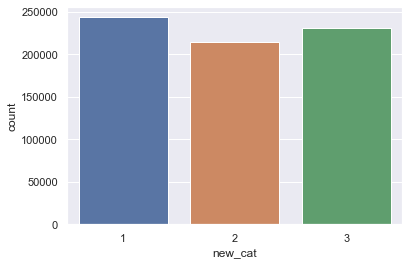

In [30]:
sns.countplot(x="new_cat",data=train)
plt.show()

Aqui la transformacion la realizamos teniendo en cuenta el valor promedio del Target_mes por cada tipo_com y el recuento de instancias correspondientes a cada tipo_com, como se muestra se podria decir que son inversamente proporcionales por lo que transformaremos esta variable categorica en numerica siguendo esta observacion y de modo que queden lo mejor posible balanceadas.

In [31]:
train.groupby(['tipo_com'])['target_mes'].mean().sort_values(ascending=False)

tipo_com
COM5    87.704325
COM4    55.852039
COM3    28.875428
COM2    16.843692
COM1    10.564512
Name: target_mes, dtype: float64

In [32]:
train['tipo_com'].value_counts()

COM2    243667
COM3    172442
COM1    158431
COM4     94812
COM5     20319
Name: tipo_com, dtype: int64

In [33]:
train['tipo_com'].replace(['COM2','COM3','COM1','COM4','COM5']
                          ,[1,2,3,4,4],inplace=True)

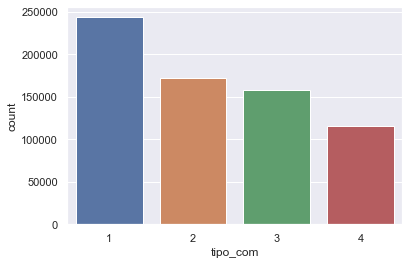

In [34]:
sns.countplot(x="tipo_com",data=train)
plt.show()

Con respencto a la variables categorica tipo de cliente notamos que el desbalanceo es muy grande de un tipo de cliente a otro, 83% clientes tipo 1 (CLI1) Y 17% clientes tipo 2 (CLI2).
Lo que creemos que este enorme desbalanceo favorecela a CLI1 de tal manera  que sera mejor que eliminemos esta variable ya que si ponemos todo en CLI1 es lo mismo que no este. Ademas la diferencia es muy grande como para balancearla con algun otro metodo.

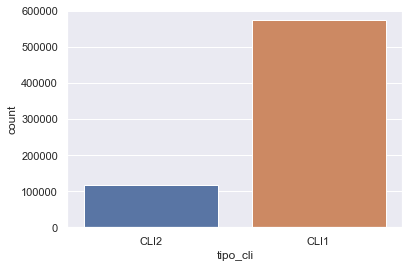

In [35]:
sns.countplot(x="tipo_cli",data=train)
plt.show()

In [36]:
train['tipo_cli'].value_counts()

CLI1    573753
CLI2    115918
Name: tipo_cli, dtype: int64

In [37]:
train.drop(['tipo_cli'], axis='columns', inplace = True)

Notamos que aqui siguiendo el mismo principio que en la variables "tipo_com" no se da lo que concluimos como inversamente proporcionalidad por lo que al ser dificil encontrar un patron, haremos one hot encoding.

In [38]:
train['categoria'].unique()

array(['V6', 'V4', 'V2', 'V3', 'V5', 'V1'], dtype=object)

In [39]:
train.groupby(['categoria'])['target_mes'].mean().sort_values(ascending=False)

categoria
V3    54.657052
V5    47.699079
V1    43.234216
V2    28.130303
V6    18.518834
V4    17.128729
Name: target_mes, dtype: float64

In [40]:
train['categoria'].value_counts()

V2    371734
V4    165220
V6     99963
V3     26690
V5     24859
V1      1205
Name: categoria, dtype: int64

In [41]:
cat=pd.get_dummies(train["categoria"],prefix="dummy")
train=pd.concat([train,cat],axis=1)

Eliminamos todas las variables que no vamos a utilizar las cuales son las mismas que explicamos al inicio y por lo cual generamos las nuevas variables.

In [42]:
train.drop(['VAR1_sum','categoria','id',
       'VAR1_prom', 'VAR1_trx', 'VAR2_sum', 'VAR2_prom', 'VAR2_trx',
       'VAR3_sum', 'VAR3_prom', 'VAR3_trx', 'VAR4_sum', 'VAR4_prom',
       'VAR4_trx', 'VAR5_sum', 'VAR5_prom', 'VAR5_trx', 'VAR6_sum',
       'VAR6_prom', 'VAR6_trx', 'VAR7_sum', 'VAR7_prom', 'VAR7_trx',
       'VAR8_sum', 'VAR8_prom', 'VAR8_trx', 'VAR9_sum', 'VAR9_prom',
       'VAR9_trx', 'VAR10_sum', 'VAR11_sum', 'VAR12_sum', 'VAR13_sum',
       'VAR14_sum', 'VAR15_sum', 'VAR16_sum', 'VAR17_sum', 'VAR18_sum',
       'VAR19_sum', 'VAR20_sum', 'VAR21_sum', 'VAR22_sum', 'VAR23_sum',
       'VAR23_prom', 'VAR23_trx', 'VAR24_sum', 'VAR24_prom', 'VAR24_trx',
       'VAR25_sum', 'VAR25_prom', 'VAR25_trx', 'VAR26_sum', 'VAR26_prom',
       'VAR26_trx', 'VAR27_sum', 'VAR27_prom', 'VAR27_trx', 'VAR28_sum',
       'VAR28_prom', 'VAR28_trx', 'VAR30_prom', 'VAR30_ratio'], axis='columns', inplace = True)

In [43]:
train.columns

Index(['mes', 'tipo_seg', 'tipo_com', 'target_mes', 'Sum_total', 'MAX_Sum',
       'Sum_trx_total', 'MAX_trx', 'new_cat', 'dummy_V1', 'dummy_V2',
       'dummy_V3', 'dummy_V4', 'dummy_V5', 'dummy_V6'],
      dtype='object')

In [44]:
train.head()

,mes,tipo_seg,tipo_com,target_mes,Sum_total,MAX_Sum,Sum_trx_total,MAX_trx,new_cat,dummy_V1,dummy_V2,dummy_V3,dummy_V4,dummy_V5,dummy_V6
0,201811,1,1,11.86,95455087.86,47209730.0,1.0,1.0,2,0,0,0,0,0,1
1,201811,2,2,18.58,21141810.58,10239169.0,145.0,92.0,2,0,0,0,0,0,1
2,201811,1,1,3.92,12718084.92,4920076.0,19.0,11.0,1,0,0,0,0,0,1
3,201811,2,2,25.75,80920367.75,30643382.0,12.0,11.0,3,0,0,0,0,0,1
4,201811,2,2,19.58,90222456.58,34485374.0,42.0,11.0,2,0,0,0,1,0,0


In [45]:
train.isna().sum()

mes              0
tipo_seg         0
tipo_com         0
target_mes       0
Sum_total        0
MAX_Sum          0
Sum_trx_total    0
MAX_trx          0
new_cat          0
dummy_V1         0
dummy_V2         0
dummy_V3         0
dummy_V4         0
dummy_V5         0
dummy_V6         0
dtype: int64

Como todas las instancia corresponden a un periodo mensual determinado de los diferentes clientes y solo enuncian mes y año vamos a separar en dos columnas mes y año dejando las como un objeto entero para que los modelos lo tomen.

In [46]:
def año_col ( fila):
        Resul= fila["mes"][ :-2]
        return Resul
def mes_col ( fila):
        Resul= fila["mes"][4:7]
        return Resul

In [47]:
train.mes = train.mes.astype(str)

In [48]:
train["año"]=train.apply(año_col, axis=1)
train["n_mes"]=train.apply(mes_col, axis=1)

In [49]:
train.año = train.año.astype(int)
train.n_mes = train.n_mes.astype(int)

In [50]:
train.drop([ 'mes'], axis='columns', inplace = True)

In [51]:
train.head()

,tipo_seg,tipo_com,target_mes,Sum_total,MAX_Sum,Sum_trx_total,MAX_trx,new_cat,dummy_V1,dummy_V2,dummy_V3,dummy_V4,dummy_V5,dummy_V6,año,n_mes
0,1,1,11.86,95455087.86,47209730.0,1.0,1.0,2,0,0,0,0,0,1,2018,11
1,2,2,18.58,21141810.58,10239169.0,145.0,92.0,2,0,0,0,0,0,1,2018,11
2,1,1,3.92,12718084.92,4920076.0,19.0,11.0,1,0,0,0,0,0,1,2018,11
3,2,2,25.75,80920367.75,30643382.0,12.0,11.0,3,0,0,0,0,0,1,2018,11
4,2,2,19.58,90222456.58,34485374.0,42.0,11.0,2,0,0,0,1,0,0,2018,11


In [52]:
train_2 = train.copy()

In [53]:
print(train_2.shape)
train_2.isna().sum()

(689671, 16)


tipo_seg         0
tipo_com         0
target_mes       0
Sum_total        0
MAX_Sum          0
Sum_trx_total    0
MAX_trx          0
new_cat          0
dummy_V1         0
dummy_V2         0
dummy_V3         0
dummy_V4         0
dummy_V5         0
dummy_V6         0
año              0
n_mes            0
dtype: int64

**Escalado de datos.**

Escalamos todas las columnas salvo las columnas a las cuales se le hizo dummy y a "target_mes" que es nuestra variable target y queremos que mantenga su escala para mas adelante poder interpretar las metricas.

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler()
scaler.fit(train_2[["tipo_seg","tipo_com","Sum_total","MAX_Sum","Sum_trx_total","MAX_trx","año","n_mes","new_cat" ]])


StandardScaler()

In [56]:
train_2[["tipo_seg","tipo_com","Sum_total","MAX_Sum","Sum_trx_total","MAX_trx","año","n_mes","new_cat"]]=scaler.transform(train_2[["tipo_seg","tipo_com","Sum_total","MAX_Sum","Sum_trx_total","MAX_trx","año","n_mes","new_cat"]])   

In [57]:
train_2.describe()

,tipo_seg,tipo_com,target_mes,Sum_total,MAX_Sum,Sum_trx_total,MAX_trx,new_cat,dummy_V1,dummy_V2,dummy_V3,dummy_V4,dummy_V5,dummy_V6,año,n_mes
count,6.896710e+05,6.896710e+05,689671.000000,6.896710e+05,6.896710e+05,6.896710e+05,6.896710e+05,6.896710e+05,689671.000000,689671.000000,689671.000000,689671.000000,689671.000000,689671.000000,6.896710e+05,6.896710e+05
mean,8.784093e-14,-1.256872e-13,25.859928,1.874920e-15,-8.748037e-16,1.107817e-14,-1.107922e-13,-3.993764e-13,0.001747,0.539002,0.038700,0.239564,0.036045,0.144943,-1.680064e-12,2.784808e-14
std,1.000001e+00,1.000001e+00,43.596608,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,0.041763,0.498477,0.192878,0.426817,0.186402,0.352044,1.000001e+00,1.000001e+00
min,-1.356525e+00,-1.101827e+00,0.000000,-7.355257e-01,-6.727682e-01,-7.659938e-01,-7.207368e-01,-1.183025e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.066694e+00,-1.457650e+00
25%,-3.325206e-01,-1.101827e+00,2.170000,-6.631272e-01,-6.022953e-01,-6.775390e-01,-6.325336e-01,-1.183025e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.065222e-01,-9.069366e-01
50%,-3.325206e-01,-1.914390e-01,10.170000,-4.254693e-01,-4.038991e-01,-4.121747e-01,-4.120256e-01,2.229686e-02,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.536500e-01,-8.086725e-02
75%,6.914835e-01,7.189491e-01,29.170000,2.351610e-01,1.589896e-01,2.659785e-01,2.053969e-01,1.227619e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.536500e-01,1.020559e+00
max,1.715487e+00,1.629337e+00,379.970000,4.192661e+00,7.555991e+00,3.951594e+00,6.335520e+00,1.227619e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.713822e+00,1.571272e+00


## **Test Train split**

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X1=train_2[['Sum_total','Sum_trx_total',"año","n_mes","tipo_seg","tipo_com","dummy_V1","dummy_V2","dummy_V3","dummy_V4","dummy_V5","dummy_V6","MAX_Sum","MAX_trx"]]
y1=train_2["target_mes"]

In [60]:
X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.2, random_state=42)

In [61]:
print(X_train.shape)
X_train.isna().sum()

(551736, 14)


Sum_total        0
Sum_trx_total    0
año              0
n_mes            0
tipo_seg         0
tipo_com         0
dummy_V1         0
dummy_V2         0
dummy_V3         0
dummy_V4         0
dummy_V5         0
dummy_V6         0
MAX_Sum          0
MAX_trx          0
dtype: int64

In [62]:
print(X_test.shape)
X_test.isna().sum()

(137935, 14)


Sum_total        0
Sum_trx_total    0
año              0
n_mes            0
tipo_seg         0
tipo_com         0
dummy_V1         0
dummy_V2         0
dummy_V3         0
dummy_V4         0
dummy_V5         0
dummy_V6         0
MAX_Sum          0
MAX_trx          0
dtype: int64

In [63]:
print(y_train.shape)
y_train.isna().sum()

(551736,)


0

In [64]:
print(y_test.shape)
y_test.isna().sum()

(137935,)


0

##  **Modelamos**

Utilizaremos tres modelos de regresion distintos y evaluaremos los resultados de las metricas seleccionadas (MAE y RMSE) para determinar el mejor modelo.

In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree  import DecisionTreeRegressor

**MODELO RandomForestRegressor**

In [66]:
Model_RF=RandomForestRegressor()
Model_RF.fit(X_train,y_train)

Model_RFpredicion_test=Model_RF.predict(X_test)
Model_RFpredicion_train=Model_RF.predict(X_train)

In [67]:
print("Modelo RandomForestRegressor- Sin Optimizacino de Hiperparametros-")
print(" ")
print("RMSE_Train:",mean_squared_error(y_train,Model_RFpredicion_train, squared=False))
print("RMSE_test:",mean_squared_error(y_test,Model_RFpredicion_test, squared=False))
print(" ")
print("MAE_Train:",mean_absolute_error(y_train,Model_RFpredicion_train))
print("MAE_test:",mean_absolute_error(y_test,Model_RFpredicion_test))

Modelo RandomForestRegressor- Sin Optimizacino de Hiperparametros-
 
RMSE_Train: 13.74301050009728
RMSE_test: 36.5274595165158
 
MAE_Train: 7.658902414399636
MAE_test: 20.34544917961813


Optimizamos lo hiperparametros a traves de un Ramdon Search CV.

In [68]:
parametersRF={"n_estimators":[100,120,130,140],
              "max_depth":[10,11,12],
              "max_features":[8,10,12],
              "min_samples_split":[2,3],
              "min_samples_leaf":[1,2]}

In [69]:
ModelRF_OptHip=RandomForestRegressor()

In [70]:
RF_RamdonSearchCV=RandomizedSearchCV(ModelRF_OptHip,parametersRF,scoring="neg_root_mean_squared_error",n_jobs=-1,n_iter=30,cv= 5)

In [71]:
FitRF_RamdonSearchCV=RF_RamdonSearchCV.fit(X_train,y_train)
best_modelRF=FitRF_RamdonSearchCV.best_estimator_

In [72]:
FitRF_RamdonSearchCV.best_params_

{'n_estimators': 130,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_features': 8,
 'max_depth': 12}

In [73]:
Model_final_RF=best_modelRF

In [74]:
Model_final_RF.fit(X_train,y_train)
Model_final_RF_predicion_test=Model_final_RF.predict(X_test)
Model_final_RF_predicion_train=Model_final_RF.predict(X_train)

In [75]:
print("Modelo RandomForestRegressor- Con Optimizacion de Hiperparametros-")
print(" ")
print("RMSE_Train:",mean_squared_error(y_train,Model_final_RF_predicion_train, squared=False))
print("RMSE_test:",mean_squared_error(y_test,Model_final_RF_predicion_test, squared=False))
print(" ")
print("MAE_Train:",mean_absolute_error(y_train,Model_final_RF_predicion_train))
print("MAE_test:",mean_absolute_error(y_test,Model_final_RF_predicion_test))

Modelo RandomForestRegressor- Con Optimizacion de Hiperparametros-
 
RMSE_Train: 34.24162428075622
RMSE_test: 36.11760332684699
 
MAE_Train: 19.03991260704086
MAE_test: 19.761133194209613


**MODELO AdaBoostRegressor**

In [76]:
Model_ada=AdaBoostRegressor()
Model_ada.fit(X_train,y_train)

Model_adapredicion_test=Model_ada.predict(X_test)
Model_adapredicion_train=Model_ada.predict(X_train)

In [77]:
print("Modelo AdaBoostRegressor- Sin Optimizacino de Hiperparametros-")
print(" ")
print("RMSE_Train:",mean_squared_error(y_train,Model_adapredicion_train, squared=False))
print("RMSE_test:",mean_squared_error(y_test,Model_adapredicion_test, squared=False))
print(" ")
print("MAE_Train:",mean_absolute_error(y_train,Model_adapredicion_train))
print("MAE_test:",mean_absolute_error(y_test,Model_adapredicion_test))

Modelo AdaBoostRegressor- Sin Optimizacino de Hiperparametros-
 
RMSE_Train: 41.79633418296885
RMSE_test: 41.7978413162917
 
MAE_Train: 29.17755788996723
MAE_test: 29.145695190136653


Antes de optimizar lo hiporparametros evaluaremos cual es la profundidad del arbol de descision optima.

In [105]:
lista_train= []
lista_test= []
max_depths=[10,13,15,16,17,18,19,20,21] 

for max_depth in max_depths:
    
    ada=AdaBoostRegressor(DecisionTreeRegressor(max_depth=max_depth,random_state=42))
    ada.fit(X_train,y_train)
            
    ytrain_predic=ada.predict(X_train)
    
    Train=mean_squared_error(y_train,ytrain_predic,squared=False)   
    lista_train.append(Train)
    
    Test_predic=ada.predict(X_test)         
    
    Test=mean_squared_error(y_test,Test_predic,squared=False)
    lista_test.append(Test)       

El max_depth 13 ya que reduce el RSME y a su vez posee poca varianza.

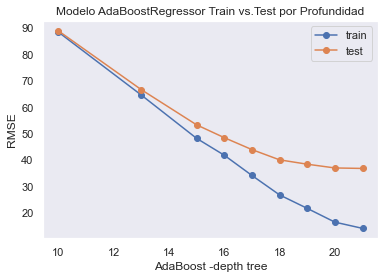

In [106]:
plt.plot(max_depths,lista_train,"o-", label="train")
plt.plot(max_depths,lista_test,"o-", label="test")
plt.title("Modelo AdaBoostRegressor Train vs.Test por Profundidad")
plt.xlabel("AdaBoost -depth tree")
plt.ylabel("RMSE")
plt.grid()
plt.legend()
plt.show()

Optimizamos lo hiperparametros a traves de un Ramdon Search CV.

In [107]:
Model_ada_R=AdaBoostRegressor(DecisionTreeRegressor(max_depth=13,random_state=42))

In [108]:
param_ada_R={"n_estimators":[50,70,80,100,120],
             "learning_rate":[0.1,0.15,0.2,0.3,0.4,0.45,0.5,1],
             "loss":["linear","square","exponential"]}

##PARAMETROS DEFUALT_ 
#.n_estimators:50
#.learning_rate:1
#.loss: linear


In [109]:
Ada_RandomizedSearchCV=RandomizedSearchCV(Model_ada_R,param_ada_R,scoring="neg_root_mean_squared_error",n_jobs=-1,n_iter=30,cv= 5)

In [110]:
FitRF_Model_ada_R=Ada_RandomizedSearchCV.fit(X_train,y_train)
best_modelADA=FitRF_Model_ada_R.best_estimator_


In [111]:
FitRF_Model_ada_R.best_params_

{'n_estimators': 70, 'loss': 'exponential', 'learning_rate': 0.1}

In [112]:
Model_final_ADA=best_modelADA

In [113]:
Model_final_ADA.fit(X_train,y_train)
Model_final_ADA_predicion_test=Model_final_ADA.predict(X_test)
Model_final_ADA_predicion_train=Model_final_ADA.predict(X_train)

In [114]:
print("Modelo AdaBoostRegressor- Con Optimizacion de Hiperparametros-")
print(" ")
print("RMSE_Train:",mean_squared_error(y_train,Model_final_ADA_predicion_train, squared=False))
print("RMSE_test:",mean_squared_error(y_test,Model_final_ADA_predicion_test, squared=False))
print(" ")
print("MAE_Train:",mean_absolute_error(y_train,Model_final_ADA_predicion_train))
print("MAE_test:",mean_absolute_error(y_test,Model_final_ADA_predicion_test))

Modelo AdaBoostRegressor- Con Optimizacion de Hiperparametros-
 
RMSE_Train: 34.7197587545491
RMSE_test: 37.996750532729564
 
MAE_Train: 22.95439006635912
MAE_test: 24.09342369939586


# **Red Neuronal**

Como tercer modelo realizamos un red neuronal.

In [118]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.keras.__version__)

2.6.0


In [119]:
def build_model():
    model = keras.Sequential([
       layers.Dense(64, activation='relu', input_shape=[14]),
       layers.Dense(64, activation='relu'),
       layers.Dense(1)
       ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    return model

In [120]:
model=build_model()

In [121]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                960       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,185
Trainable params: 5,185
Non-trainable params: 0
_________________________________________________________________


In [122]:
model.fit(X_train, y_train, epochs=100, validation_split = 0.2, verbose=1)

Epoch 1/100
13794/13794 [==============================] - 12s 819us/step - loss: 1389.5808 - mae: 20.6048 - mse: 1389.5808 - val_loss: 1349.9209 - val_mae: 20.3578 - val_mse: 1349.9209
Epoch 2/100
13794/13794 [==============================] - 11s 811us/step - loss: 1342.7361 - mae: 20.2076 - mse: 1342.7361 - val_loss: 1340.9690 - val_mae: 19.3075 - val_mse: 1340.9690
Epoch 3/100
13794/13794 [==============================] - 11s 814us/step - loss: 1331.2661 - mae: 20.0828 - mse: 1331.2661 - val_loss: 1330.4382 - val_mae: 19.6019 - val_mse: 1330.4382
Epoch 4/100
13794/13794 [==============================] - 11s 814us/step - loss: 1325.7493 - mae: 20.0393 - mse: 1325.7493 - val_loss: 1326.9307 - val_mae: 20.6078 - val_mse: 1326.9307
Epoch 5/100
13794/13794 [==============================] - 11s 816us/step - loss: 1320.7109 - mae: 19.9832 - mse: 1320.7109 - val_loss: 1323.3259 - val_mae: 19.6487 - val_mse: 1323.3259
Epoch 6/100
13794/13794 [==============================] - 11s 819us/s

13794/13794 [==============================] - 12s 883us/step - loss: 1285.0010 - mae: 19.6620 - mse: 1285.0010 - val_loss: 1301.7965 - val_mae: 19.8427 - val_mse: 1301.7965
Epoch 45/100
13794/13794 [==============================] - 12s 882us/step - loss: 1284.4607 - mae: 19.6628 - mse: 1284.4607 - val_loss: 1300.4943 - val_mae: 20.3658 - val_mse: 1300.4943
Epoch 46/100
13794/13794 [==============================] - 12s 881us/step - loss: 1284.0215 - mae: 19.6536 - mse: 1284.0215 - val_loss: 1303.0642 - val_mae: 19.7390 - val_mse: 1303.0642
Epoch 47/100
13794/13794 [==============================] - 12s 880us/step - loss: 1283.4856 - mae: 19.6577 - mse: 1283.4856 - val_loss: 1301.6302 - val_mae: 19.6147 - val_mse: 1301.6302
Epoch 48/100
13794/13794 [==============================] - 12s 881us/step - loss: 1282.8772 - mae: 19.6470 - mse: 1282.8772 - val_loss: 1307.6165 - val_mae: 20.0921 - val_mse: 1307.6165
Epoch 49/100
13794/13794 [==============================] - 12s 890us/step - l

13794/13794 [==============================] - 12s 883us/step - loss: 1272.7238 - mae: 19.5754 - mse: 1272.7238 - val_loss: 1297.5432 - val_mae: 19.4765 - val_mse: 1297.5432
Epoch 88/100
13794/13794 [==============================] - 12s 876us/step - loss: 1272.2603 - mae: 19.5733 - mse: 1272.2603 - val_loss: 1303.1685 - val_mae: 20.2871 - val_mse: 1303.1685
Epoch 89/100
13794/13794 [==============================] - 12s 873us/step - loss: 1272.2867 - mae: 19.5766 - mse: 1272.2867 - val_loss: 1296.6382 - val_mae: 19.5708 - val_mse: 1296.6382
Epoch 90/100
13794/13794 [==============================] - 12s 878us/step - loss: 1271.3728 - mae: 19.5634 - mse: 1271.3728 - val_loss: 1303.3467 - val_mae: 19.5065 - val_mse: 1303.3467
Epoch 91/100
13794/13794 [==============================] - 12s 876us/step - loss: 1271.8374 - mae: 19.5804 - mse: 1271.8374 - val_loss: 1300.3287 - val_mae: 19.2316 - val_mse: 1300.3287
Epoch 92/100
13794/13794 [==============================] - 12s 878us/step - l

In [123]:
y_pred=model.predict(X_test)

In [124]:
y_pred.shape

(137935, 1)

In [125]:
y_pred_train=model.predict(X_train)

In [126]:
print("RED NEURONAL")
print(" ")
print("RMSE_Train:",mean_squared_error(y_train,y_pred_train, squared=False))
print("RMSE_test:",mean_squared_error(y_test,y_pred, squared=False))
print(" ")
print("MAE_Train:",mean_absolute_error(y_train,y_pred_train))
print("MAE_test:",mean_absolute_error(y_test,y_pred))

RED NEURONAL
 
RMSE_Train: 35.64928140191938
RMSE_test: 36.02980438147655
 
MAE_Train: 19.70966477196589
MAE_test: 19.82953530652552


Como conclusio vemos que le mejor resultado lo arroja la red neuronal por muy poca diferencia con respecto al modelo ramdon forest.La descision de cual utilizar estara dada por lo recursos computacionales. Por mi lado recomiendo utilizar el Ramdon Forest optimisado ya que es un modelo mas simple que la red neuronal y la diferencia en test es infima RF RMSE: 36.11 y RN RMSE: 36,02.